In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.metrics.pairwise import euclidean_distances
%matplotlib inline

In [3]:
n_samples = 100
random_state = 170

center_points = [[1, 1], [-1, -1], [1, -1]]
X, y = make_blobs(n_samples = n_samples, random_state = random_state, centers = center_points, cluster_std = 0.6)

print("Số chiều dữ liệu: ", X.shape, y.shape)
print("5 điểm dữ liệu đầu tiên: \n", X[:5])

Số chiều dữ liệu:  (100, 2) (100,)
5 điểm dữ liệu đầu tiên: 
 [[ 1.26241305  0.94872541]
 [-0.39743873 -1.18567406]
 [ 1.35081331  0.48041993]
 [ 1.21219555  0.98929291]
 [-0.75344338 -1.09784774]]


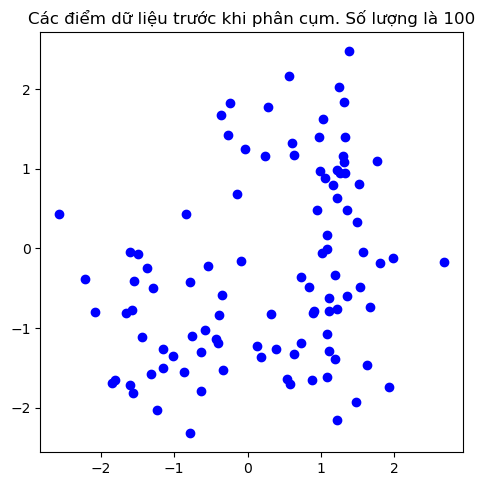

In [6]:
plt.figure(figsize = (12, 12))
plt.subplot(221)
plt.scatter(X[:, 0], X[:, 1], c = "blue")
plt.title("Các điểm dữ liệu trước khi phân cụm. Số lượng là {}".format(n_samples))
plt.show()

In [8]:
def k_init(X, n_cluster):
    n_samples, n_features = X.shape

    init_centroid = np.empty((n_cluster, n_features), dtype = X.dtype)

    avg_point = sum(X) / len(X)

    distance_to_avg = euclidean_distances([avg_point], X, squared = True)
    center_id = np.argmax(distance_to_avg)
    init_centroid[0] = X[center_id]

    for i in range(1, n_cluster):
        distance = euclidean_distances(init_centroid[:i], X, squared = True)
        min_of_distance = np.min(distance, axis = 0)
        center_id = np.argmax(min_of_distance)
        init_centroid[i] = X[center_id]

    init_centroid = init_centroid.tolist()
    return init_centroid

k_cluster = 3
init_centroid = k_init(X, n_cluster = k_cluster)
init_centroid

[[1.3836252481600562, 2.472385503005777],
 [-1.8436371976200112, -1.693538693248048],
 [1.930981677439216, -1.7409580279152177]]

In [11]:
def k_means(X, n_cluster):
    
    n_samples = len(X)
    new_centroid = k_init(X, n_cluster)
    best_centroid = None
    label = np.empty(n_samples, dtype = int)

    while best_centroid != new_centroid:
        best_centroid = new_centroid
        distance_to_centroids = euclidean_distances(X, best_centroid, squared = True)

        for i in range(n_samples):
            label[i] = np.argmin(distance_to_centroids[i])

        for j in range(n_cluster):
            label_j = np.where(label == j)[0]
            cluster_j = X[label_j]
            new_centroid[j] = sum(cluster_j) / len(cluster_j)
            new_centroid[j] = new_centroid[j].tolist()

    best_centroid = np.asarray(best_centroid)
    return best_centroid, label    

In [12]:
best_centroid, label = k_means(X = X, n_cluster = 3)
print(label)
print(best_centroid)

[0 1 0 0 1 2 0 1 2 0 2 1 1 2 2 1 1 2 2 0 2 2 2 0 1 1 0 1 1 0 0 0 1 0 0 2 0
 0 1 2 2 2 1 2 2 1 1 2 1 2 0 1 2 2 1 0 2 2 0 1 2 1 2 1 2 0 1 0 0 0 2 1 1 1
 1 1 2 1 0 2 2 2 2 1 2 1 0 2 2 0 0 0 1 2 2 1 0 1 0 1]
[[ 0.8610048   1.25934367]
 [-1.13949326 -0.97100768]
 [ 1.12129576 -0.87895976]]


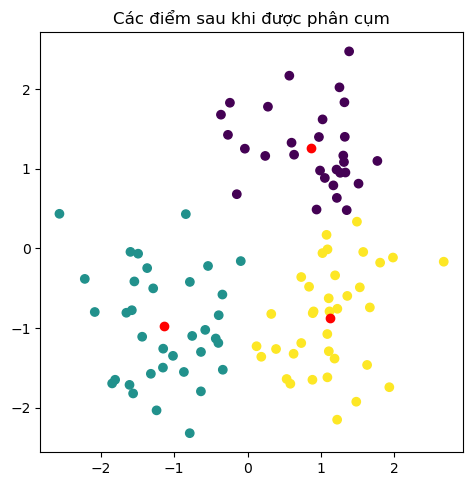

In [13]:
plt.figure(figsize = (12, 12))
plt.subplot(221)
plt.scatter(X[:, 0], X[:, 1], c = label)
plt.scatter(best_centroid[:, 0], best_centroid[:, 1], c = "red")
plt.title("Các điểm sau khi được phân cụm")
plt.show()

In [15]:
from skimage import io
import matplotlib.image as image
from IPython.display import Image, display

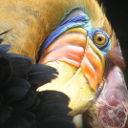

Số chiều của dữ liệu hình ảnh:  (16384, 3)
Tổng số điểm ảnh là:  16384
Mỗi điểm ảnh có số chiều là:  3


In [21]:
path_img = 'bird_small.png'
display(Image(path_img, width = 250, unconfined = True))
img = io.imread(path_img)
data_img = (img / 255.0).reshape(-1, img.shape[2])
img_shape = img.shape

print("Số chiều của dữ liệu hình ảnh: ", data_img.shape)
print("Tổng số điểm ảnh là: ", data_img.shape[0])
print("Mỗi điểm ảnh có số chiều là: ", data_img.shape[1])

In [27]:
n_color = 10
best_centroid, label = k_means(data_img, n_cluster = n_color)
img_128 = best_centroid[label]

img_128 = np.reshape(img_128, img_shape)
image.imsave('img_128.png', img_128)

Ảnh nén bằng K-means tự viết


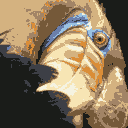

Ảnh nén bằng K-means của thư viện 


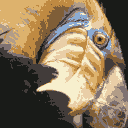

Ảnh gốc


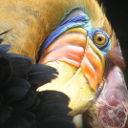

In [28]:
print('Ảnh nén bằng K-means tự viết')
display(Image('img_128.png', width = 250, unconfined = True))
print('Ảnh nén bằng K-means của thư viện ')
display(Image('img128.png', width = 250, unconfined = True))
print('Ảnh gốc')
display(Image(path_img, width = 250, unconfined = True))